# The following project is built with an intention to help in the analysis of the coverage of various media outlets.

### We try to count the number of articles a given media has dedicated to a given topic.

###### We hypothesize that if the article is about a given subject, that words most likely exists in the title of the article.
###### As in the following case, we assume if the article is about covid, the words COVID or COVID-19 or CORONA VIRUS etc would be present in the title


In [1]:
!pip install newspaper3k

#####Importing necessary packages...

In [4]:
from bs4 import BeautifulSoup
from bs4.dammit import EncodingDetector
from newspaper import Article
import requests
import matplotlib.pyplot as plt 
import numpy as np

In [5]:
URL=["https://www.timesnownews.com/coronavirus","https://www.indiatoday.in/coronavirus","https://www.ndtv.com/coronavirus?pfrom=home-mainnavgation"]
Url_count = []

The following for loop scrapres all the links that exist within a url from the URL list.

Each of the extracted link's title is then printed

In [6]:
for url in URL:
    parser = 'html.parser'  
    resp = requests.get(url)
    http_encoding = resp.encoding if 'charset' in resp.headers.get('content-type', '').lower() else None
    html_encoding = EncodingDetector.find_declared_encoding(resp.content, is_html=True)
    encoding = html_encoding or http_encoding
    soup = BeautifulSoup(resp.content, parser, from_encoding=encoding)
        
    links = []
    for link in soup.find_all('a', href=True):
        if "javascript" in link["href"]:
            continue
        links.append(link['href'])
    count = 0 
    for link in links:
        try:
            article = Article(link)
            article.download()
            article.parse()
            print(article.title)
            if "COVID" in article.title or "coronavirus" in article.title or "Coronavirus"in article.title or "Covid-19" in article.title or "COVID-19" in article.title :
                    count += 1
    
        except:
            pass
    Url_count.append(count)
    print()
    print()
    print()

TIMES NOW

Times Now (@timesnow) • Instagram photos and videos
FIFA World Cup 2022: Full Schedule, Live Score, News, Stats, Points Table, Teams
Facebook ಗೆ ಲಾಗಿನ್ ಮಾಡಿ

LinkedIn
WhatsAppನಲ್ಲಿ ಹಂಚಿಕೂಳ್ಳಿ
Entertainment News - Latest Bollywood News, Hollywood, Celebrity News and Gossips
Bollywood News, Latest Bollywood News and Bollywood Gossips Today
Bollywood News, Latest Bollywood News and Bollywood Gossips Today
Web Stories, Entertainment Web Stories, Photo Stories, AMP Stories
Bollywood News, Latest Bollywood News and Bollywood Gossips Today
Reviews, Movie Reviews, Bollywood Movie Reviews, Hollywood Movie and Web Series Reviews
Bollywood News, Latest Bollywood News and Bollywood Gossips Today
Reviews, Movie Reviews, Bollywood Movie Reviews, Hollywood Movie and Web Series Reviews
Reviews, Movie Reviews, Bollywood Movie Reviews, Hollywood Movie and Web Series Reviews
Inside Hanshika Motwani and Sohael's wedding: Entry on Din Shagna Da to grand varmala, see VIDEOS
Bigg Boss 16 celebrity

IndiaToday Magazine For the Thinking Indian
Time Magazine India: Buy Time Magazine Print + Digital Online India, Time Magazine Subscription
India Today Live TV: Free Live TV, Live News Streaming and Live TV Newscast
Aaj Tak Live TV: Free Live TV, Live News Streaming and TV Newscast at आजतक लाइव टीवी
Good News Today Live TV
एजेंडा आज तक 2021 - Aaj Tak
India Today Conclave West 2022 Mumbai, Grand Hyatt Hotel
साहित्य आज तक 2022 - Aaj Tak
Love Tips, Relationship Advice and Romantic Love Stories
Podcast Audio, Podcast News Audio, Podcast Online News
India Today Games
ESPL India 2021: Free Fire eSports Premier League Tournament 2021 in India Registration Details
PR Newswire
IndiaToday
Breaking News and Top Video News
India Today Newsletter
IndiaToday Group Privacy Policy
Correction policy
Thomson Press (India) Limited
Care Today Fund takes relief to Covid-19 impacted communities with the support of TV Today Network Ltd
रेट कार्ड
Headlines Today News: Online News Aggregator of India Today, TO

The following code displays the number of occurances of a given word ("covid") in the title of each news website

In [7]:
print('\033[1m'+ 'Number of articles with the word "coronavirus" in it' )    
for url, count in zip(URL, Url_count):
       
    print('\033[1m'+ "Site:", url, '\033[1m'+ "Count:", count)
    print()
    print()
print('\033[1m'+'Graphical representation of the word count')

Number of articles with the word "coronavirus" in it
Site: https://www.timesnownews.com/coronavirus Count: 0


Site: https://www.indiatoday.in/coronavirus Count: 13


Site: https://www.ndtv.com/coronavirus?pfrom=home-mainnavgation Count: 22


Graphical representation of the word count


Finally, the following code displays a bar graph showing the comparisions between different websites.

Text(0.5, 0, 'News Websites')

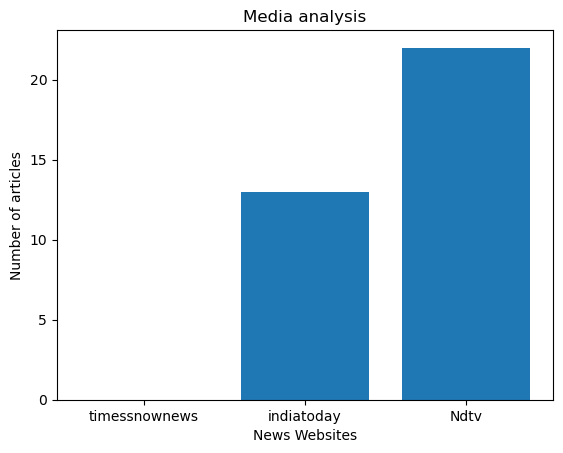

In [8]:
# make an array for the x-axis from the URL List 
nx = np.arange(len(URL)) 

labels = ['timessnownews', 'indiatoday','Ndtv']

fig = plt.figure()
ax = fig.gca()
ax.set_title('Media analysis')
ax.bar(nx, Url_count)
ax.set_xticks(nx)
ax.set_xticklabels(labels)
ax.set_ylabel('Number of articles')
ax.set_xlabel('News Websites')